# Problem Statement: Analyzing the Impact of COVID-19 on Unemployment Rates

The unemployment rate measures the proportion of the labor force that is unemployed, providing a key indicator of economic health. During the COVID-19 pandemic, the world experienced a sharp increase in unemployment rates, driven by lockdowns, business closures, and economic disruptions.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("Unemployment in India.csv")
df
pd.set_option("display.max.rows",None)

# Cleaning Data

In [3]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [15]:
df= df.dropna()

In [16]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [6]:
#  to sum how many duplicate values present in df
df.duplicated().sum()

0

In [17]:
# to reset index and put in df2
df = df.reset_index(drop=True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,2019-11-30,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,2019-12-31,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural


In [18]:
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [19]:
# to correct date 
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [20]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,2019-11-30,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,2019-12-31,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,2020-01-31,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,2020-02-29,Monthly,5.91,11723617.0,42.83,Rural


In [11]:
# to remove unusual space from column for better visualize
df.columns = df.columns.str.strip()

# EDA

# Trend of Estimated Unemployment Rate Over Time 

The unemployment rate experienced a notable increase during the specified period, reaching its highest point around mid-2020. This trend suggests economic challenges and potential job losses during that time.

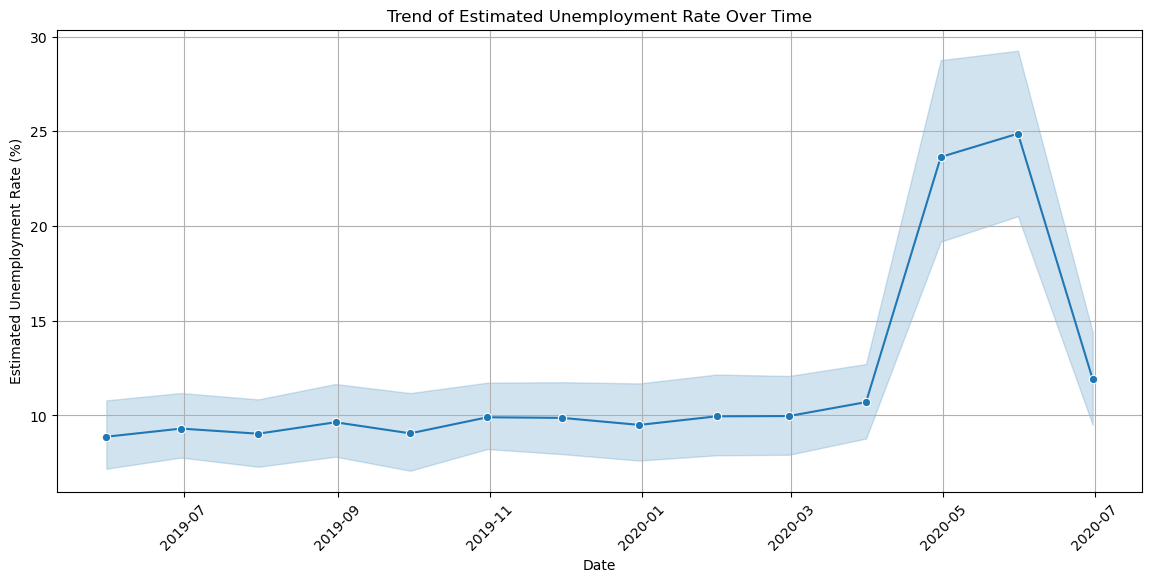

In [66]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', marker='o')
plt.title('Trend of Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid()
plt.savefig("Trend of Estimated Unemployment Rate Over Time.png", dpi=300, bbox_inches='tight')


# Unemployment Rate by Month in 2020

The unemployment rate in 2020 showed significant fluctuations, starting with relative stability around 10% in the first quarter. However, it spiked dramatically in April, reaching a peak of approximately 24% due to the impact of the COVID-19 pandemic.

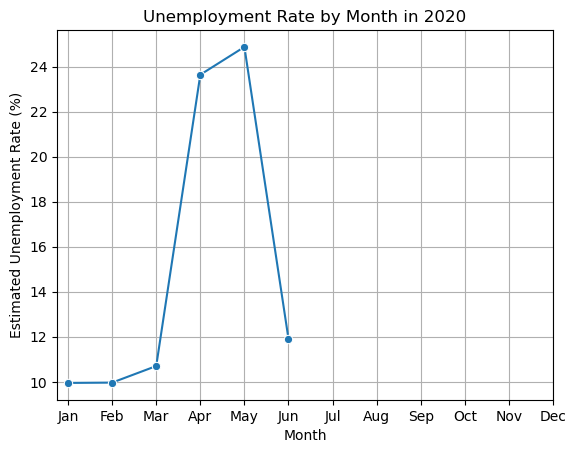

In [67]:
df_2020 = df[df['Date'].dt.year == 2020].copy()

# Extract the month from the Date column
df_2020['Month'] = df_2020['Date'].dt.month

# Group by Region and Month, and calculate the mean unemployment rate for each month
monthly_unemployment = df_2020.groupby([ 'Month'])['Estimated Unemployment Rate (%)'].mean().reset_index()
# monthly_unemployment
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=monthly_unemployment, marker='o')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Unemployment Rate by Month in 2020')
plt.grid()
plt.savefig("Unemployment Rate by Month in 2020.png", dpi=300, bbox_inches='tight')


# Unemployment Rate by Month in 2019

The unemployment rate in 2019 showed a general upward trend, with some fluctuations throughout the year. The highest rate was recorded in October.

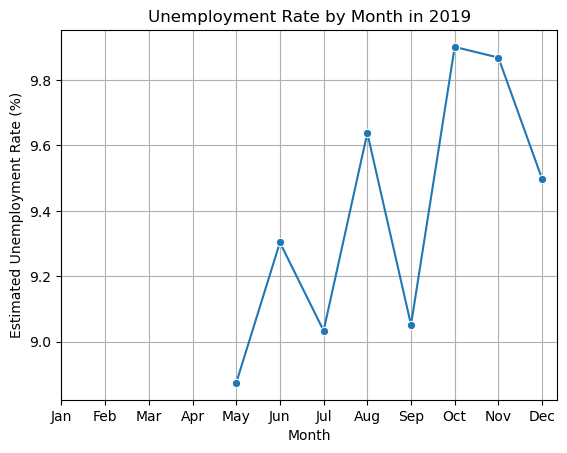

In [68]:
df_2019 = df[df['Date'].dt.year == 2019].copy()

# Extract the month from the Date column
df_2019['Month'] = df_2019['Date'].dt.month

# Group by Region and Month, and calculate the mean unemployment rate for each month
monthly_unemployment = df_2019.groupby([ 'Month'])['Estimated Unemployment Rate (%)'].mean().reset_index()
# print(monthly_unemployment)
# monthly_unemployment
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=monthly_unemployment, marker='o')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Unemployment Rate by Month in 2019')
plt.grid()
plt.savefig("Unemployment Rate by Month in 2019.png", dpi=300, bbox_inches='tight')


# Average Unemployment Rate by Region

The analysis of unemployment rates reveals significant regional disparities, with states like 'Tripura', 'Haryana', and 'Jharkhand' showing the highest estimated unemployment rates, exceeding 20%, while 'Meghalaya' reports the lowest rate, below 5%. There are clear regional clusters, as northern states such as 'Bihar' and 'Himachal Pradesh' also exhibit higher unemployment rates, while southern states like 'Kerala', 'Tamil Nadu', and 'Goa' tend to have much lower rates. 

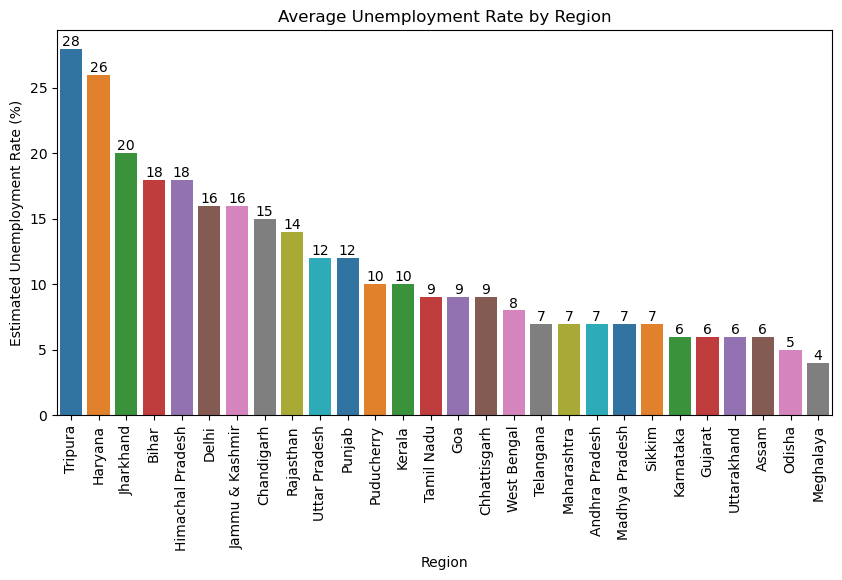

In [71]:
plt.figure(figsize=(10, 5))

# Group data and create barplot
Area = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().reset_index().sort_values(("Estimated Unemployment Rate (%)"),ascending = False)
Area["Estimated Unemployment Rate (%)"] = Area["Estimated Unemployment Rate (%)"].astype(int)

ax = sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=Area,palette="tab10")

plt.title('Average Unemployment Rate by Region')
plt.xticks(rotation=90)

plt.savefig("Average Unemployment Rate by Region.png", dpi=300, bbox_inches='tight')
for x in ax.containers:
    ax.bar_label(x)

# Average Labor Participation Rate by Region

The analysis of labor participation rates shows distinct regional patterns, with states like Tripura, Meghalaya, and Telangana having the highest participation rates, exceeding 50%, while Bihar and Kerala have the lowest, below 35%. Regional clusters are evident, as northeastern states such as Tripura, Meghalaya, and Assam display higher labor participation, while some southern states, including Kerala and Bihar, exhibit lower rates. 

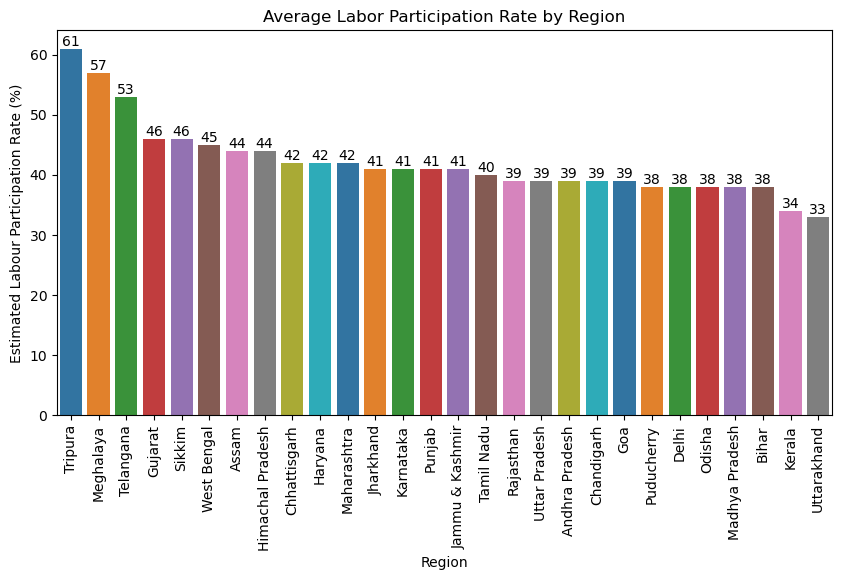

In [73]:
plt.figure(figsize=(10, 5))

Area = df.groupby("Region")["Estimated Labour Participation Rate (%)"].mean().reset_index().sort_values(("Estimated Labour Participation Rate (%)"),ascending = False)
Area["Estimated Labour Participation Rate (%)"] = Area["Estimated Labour Participation Rate (%)"].astype(int)

ax = sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data=Area,palette="tab10")

plt.title('Average Labor Participation Rate by Region')
plt.xticks(rotation=90)

plt.savefig("Average Labor Participation Rate by Region.png", dpi=300, bbox_inches='tight')
for x in ax.containers:
    ax.bar_label(x)

# Unemployment Rate Comparison between lowest and Highest Region

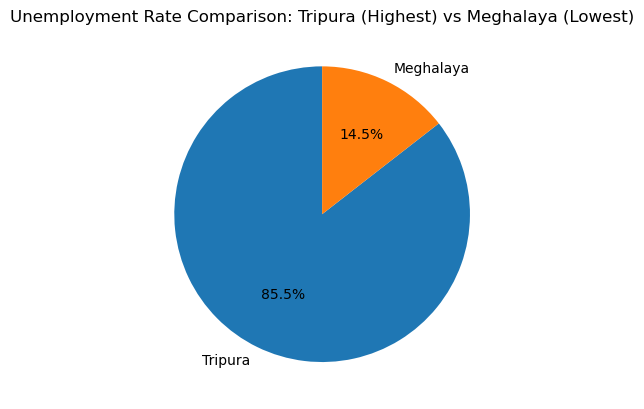

In [96]:
# Calculate average unemployment by region
region_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

highest_region = region_unemployment.loc[region_unemployment['Estimated Unemployment Rate (%)'].idxmax()]
lowest_region = region_unemployment.loc[region_unemployment['Estimated Unemployment Rate (%)'].idxmin()]

# print(f"Highest Unemployment Rate: {highest_region['Region']} : {highest_region['Estimated Unemployment Rate (%)']:.2f}%")
# print(f"Lowest Unemployment Rate: {lowest_region['Region']} : {lowest_region['Estimated Unemployment Rate (%)']:.2f}%")

regions = [highest_region['Region'], lowest_region['Region']]
unemployment_rates = [highest_region['Estimated Unemployment Rate (%)'], lowest_region['Estimated Unemployment Rate (%)']]

plt.pie(unemployment_rates, labels=regions, autopct='%1.1f%%', startangle=90)
plt.title(f'Unemployment Rate Comparison: {highest_region["Region"]} (Highest) vs {lowest_region["Region"]} (Lowest)');

plt.savefig("Comparison between lowest and Highest Region.png", dpi=300, bbox_inches='tight')


# Monthly Patterns in Unemployment Rate

The analysis of monthly unemployment rates reveals clear seasonal variations, with notable fluctuations in unemployment levels throughout the year. April and May exhibit the highest median unemployment rates, suggesting that unemployment tends to peak during these months, while December and January have the lowest median rates, indicating lower unemployment levels. Additionally, months like April and May show more outliers, reflecting greater variability and uncertainty in unemployment rates during these periods

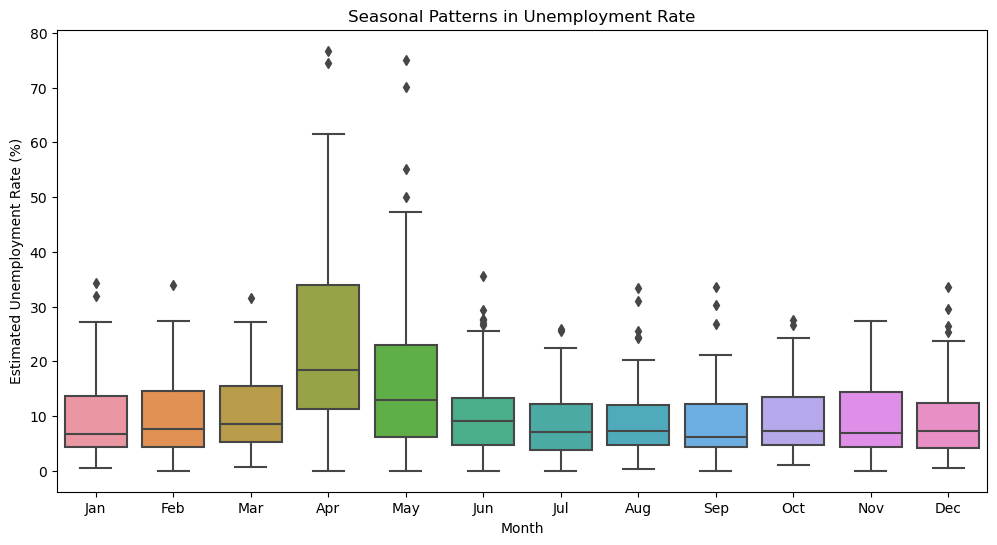

In [78]:
# Add a column for month
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Estimated Unemployment Rate (%)')
plt.title('Seasonal Patterns in Unemployment Rate')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
plt.savefig("Seasonal Patterns in Unemployment Rate.png", dpi=300, bbox_inches='tight')


# Unemployment Rates Comparison by Area

The data suggests that unemployment is more prevalent in urban areas than in rural areas. This could be attributed to various factors such as a higher concentration of industries in urban areas, greater competition for jobs, and a larger influx of people seeking employment opportunities in cities.

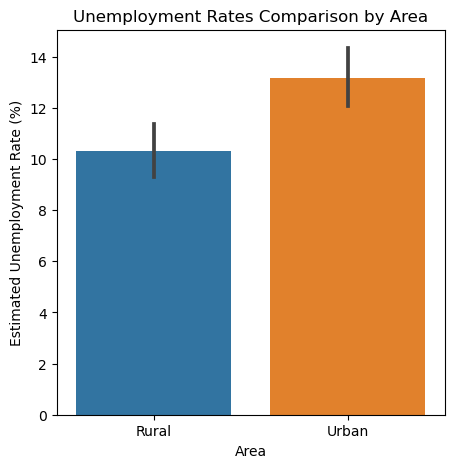

In [87]:
plt.figure(figsize=(5, 5))
sns.barplot(data=df, x='Area', y='Estimated Unemployment Rate (%)', palette="tab10")
plt.title('Unemployment Rates Comparison by Area');                
plt.savefig("Unemployment Rates Comparison by Area.png", dpi=300, bbox_inches='tight')


# Correlation Between different Variable

There is a strong negative correlation of -0.22 between the Estimated Unemployment Rate (%) and Estimated Employed, indicating that higher unemployment rates are associated with fewer employed individuals. In contrast, the Estimated Unemployment Rate (%) and Estimated Labour Participation Rate (%) have a very weak positive correlation of 0.0026, suggesting a minimal connection between unemployment and labor participation. Similarly, the Estimated Labour Participation Rate (%) and Estimated Employed show a weak positive correlation of 0.011, indicating a slight association between higher labor participation and employment levels.

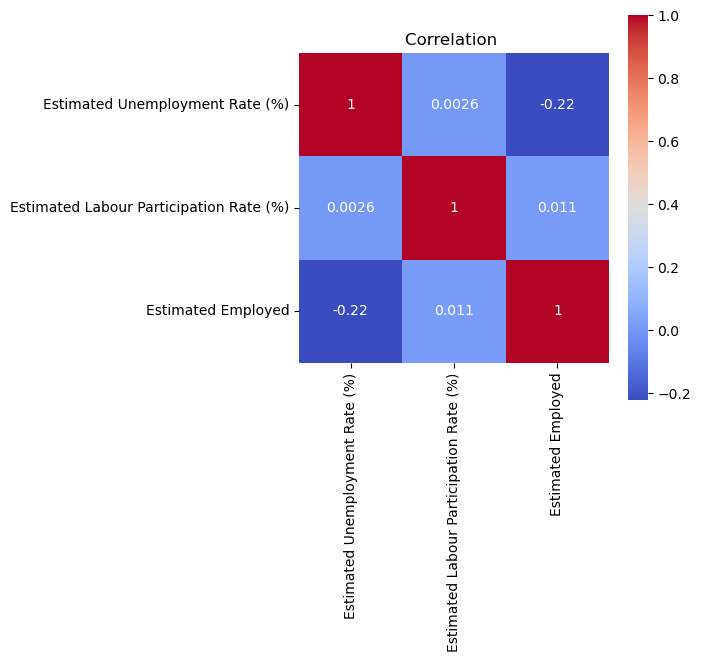

In [90]:
correlation_matrix = df[['Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)', 'Estimated Employed']].corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation ');
plt.savefig("Correlation.png", dpi=300, bbox_inches='tight')


# Impact on Unemployment Rate During COVID-19

In [35]:
# Define pre-pandemic and peak pandemic periods
pre_pandemic = df[df['Date'] < '2019-12-31']
peak_pandemic = df[(df['Date'] >= '2019-12-31') & (df['Date'] <= '2020-06-30')]

# Calculate average unemployment rates for both periods
pre_avg = pre_pandemic['Estimated Unemployment Rate (%)'].mean()
peak_avg = peak_pandemic['Estimated Unemployment Rate (%)'].mean()

# Calculate the percentage increase in unemployment rate
percentage_increase = ((peak_avg - pre_avg) / pre_avg) * 100

# Output the percentage increase
print(f"Percentage Increase in Unemployment Rate During COVID-19: {percentage_increase:.2f}%")

Percentage Increase in Unemployment Rate During COVID-19: 52.19%


# Estimated Employee by Region

The box plots reveal significant regional variations in employment levels, with Uttar Pradesh and West Bengal showing the highest median estimated employment, indicating larger workforces, while Goa and Puducherry have the lowest, suggesting smaller employed populations. Uttar Pradesh and West Bengal have more outliers, it means that the number of employed people in these regions can vary a lot, with some areas having much higher or lower employment than expected. This shows that employment patterns in these regions are not consistent and can be very different from place to place.

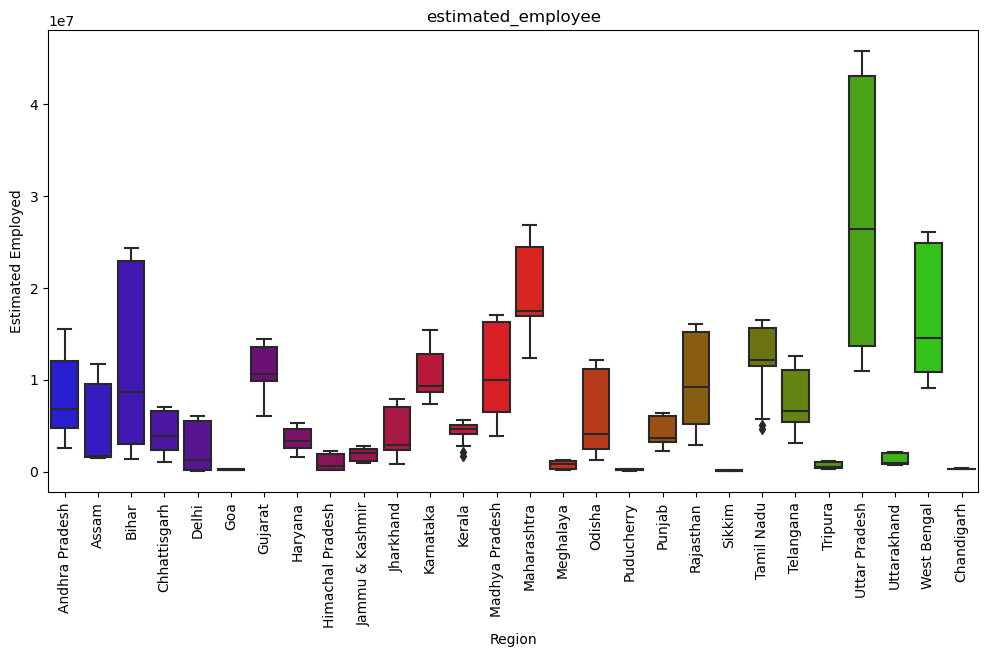

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Estimated Employed', data=df,palette="brg")
plt.title("estimated_employee")
plt.xticks(rotation=90);
plt.savefig("estimated_employee by region.png", dpi=300, bbox_inches='tight')


# Estimated Labour Participation vs Unemployment Rate by Region

The scatter plot shows a general clustering of points, indicating a negative correlation between the estimated labor participation rate and the estimated unemployment rate—as labor participation increases, unemployment tends to decrease. However, there are a few outliers where this relationship does not hold, suggesting some regions deviate from the overall trend.

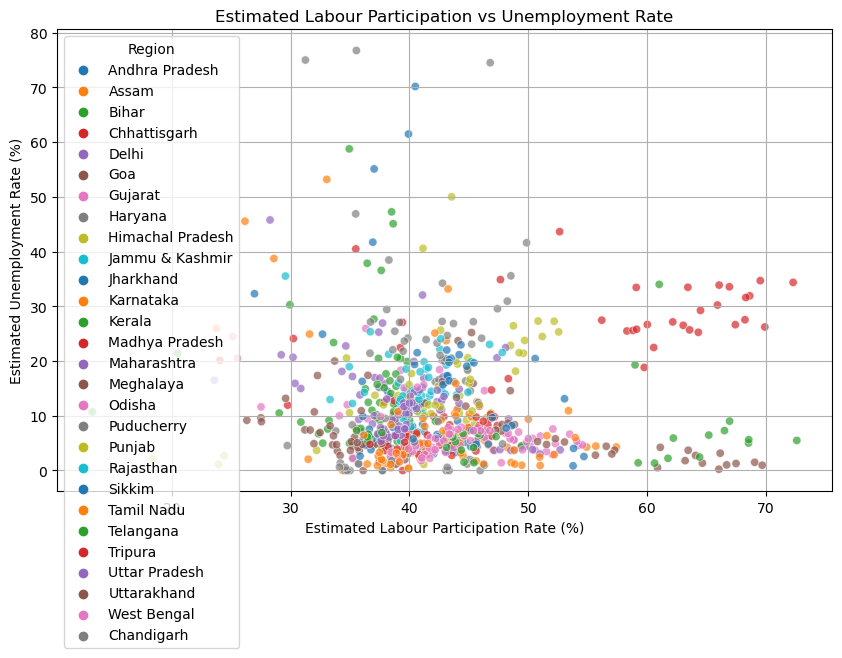

In [93]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', hue='Region', alpha=0.7,palette="tab10")
plt.title('Estimated Labour Participation vs Unemployment Rate')
plt.grid()
plt.savefig("Estimated Labour Participation vs Unemployment Rate.png", dpi=300, bbox_inches='tight')


# Distribution of Unemployment Rate

The distribution of unemployment rates shows a clear pattern of right-skewness, with a concentration of rates between 5% and 10% and a few regions experiencing significantly higher levels of unemployment.Most regions have moderate unemployment rates, but a few have very high rates, possibly due to regional differences or industry-specific problems.

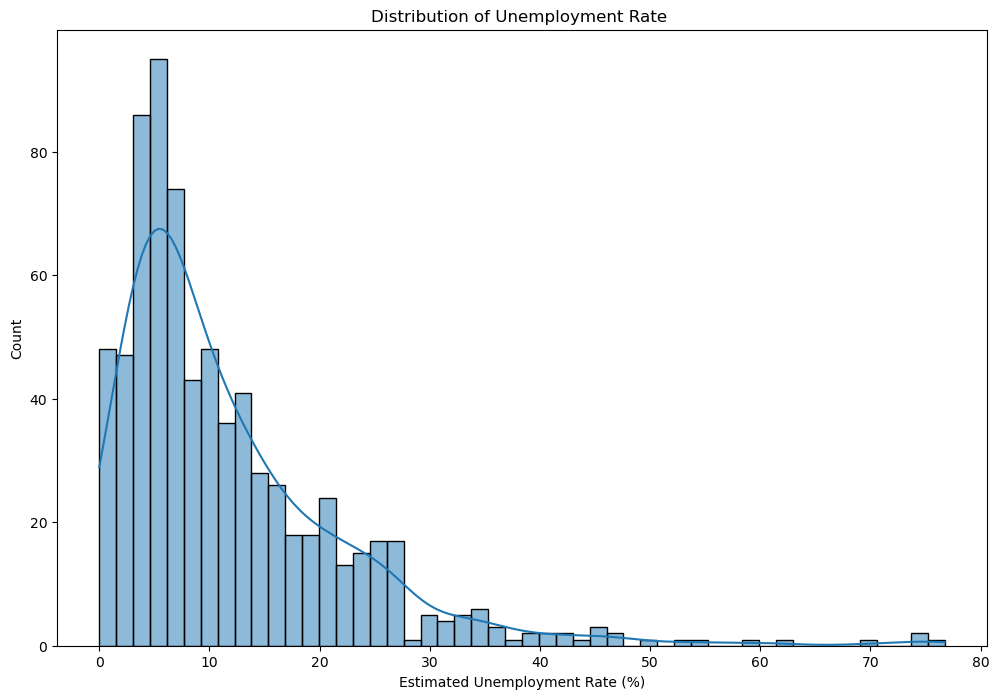

In [62]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Estimated Unemployment Rate (%)', kde=True,bins=50)
plt.title('Distribution of Unemployment Rate ')
plt.savefig("Distribution of Unemployment Rate.png", dpi=300, bbox_inches='tight')


# Distribution of Labour Participation Rate

The distribution of labor participation rates appears to be approximately normal, with a clear bell-shaped curve. This suggests that a majority of regions have labor participation rates clustered around the mean (which appears to be around 45-50%), with fewer regions having significantly higher or lower rates.




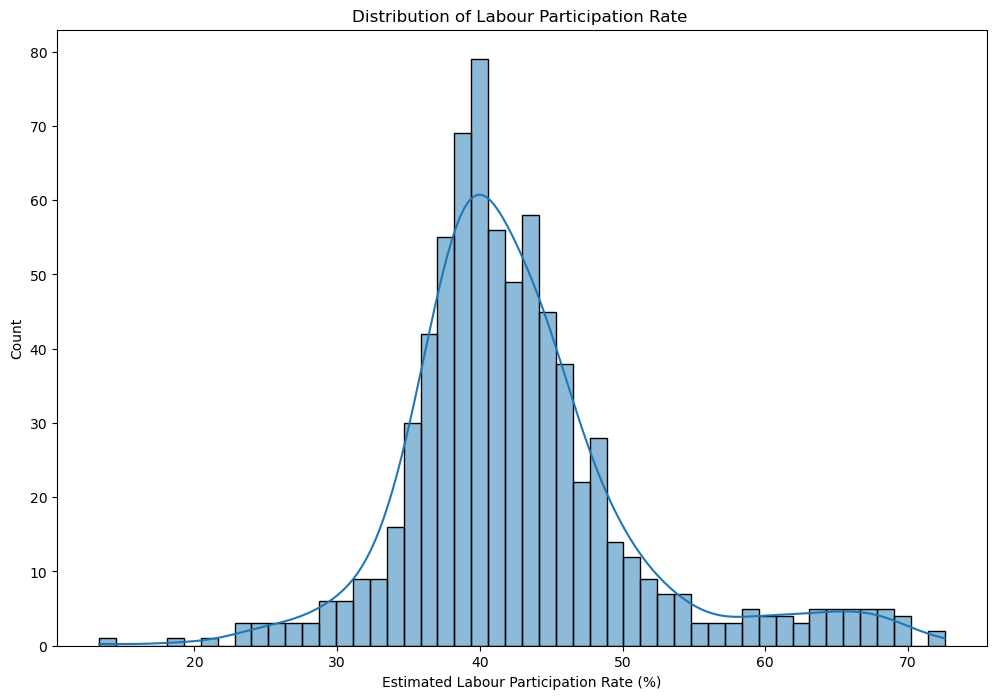

In [75]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Estimated Labour Participation Rate (%)', kde=True,bins=50)
plt.title('Distribution of Labour Participation Rate ');
plt.savefig("Distribution of Labour Participation Rate.png", dpi=300, bbox_inches='tight')
